### ДЗ к уроку «Кейс 1. EDA по Hourly Energy Consumption и Brent»

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
import pandas.util.testing as tm

import seaborn as sns

C:\Users\Larin-GV\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

In [2]:
tabledata = [["а)", "Зависимость цены на недвижимость в конкретном регионе от времени", " да "],
         ["б)", "Скорость полета самолета при перелете из аэропорта А в аэропорт В", " да "],
         ["в)", "Количество отказов компьютера", " да "],
         ["г)", "Число обращений в поликлинику по району", " да "],
        ["д)", "Координаты автобуса при движении по маршруту", " да "],
        ["е)", "Координаты фигуры нарушителя в файле видеофиксации охранной системы", " нет "]]
    

In [3]:
pd.DataFrame(tabledata, columns=["№№","Набор данных", "Интерпретация, как временный ряд"])

,№№,Набор данных,"Интерпретация, как временный ряд"
0,а),Зависимость цены на недвижимость в конкретном ...,да
1,б),Скорость полета самолета при перелете из аэроп...,да
2,в),Количество отказов компьютера,да
3,г),Число обращений в поликлинику по району,да
4,д),Координаты автобуса при движении по маршруту,да
5,е),Координаты фигуры нарушителя в файле видеофикс...,нет


#### 2. вариант 1) Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [4]:
# Duquesne Light Co. (DUQ).
data_deok = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [5]:
data_deok.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [6]:
data_deok.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [7]:
data_deok['DUQ_MW'].isnull().sum()             # пропусков нет

0

Text(0, 0.5, 'МВт')

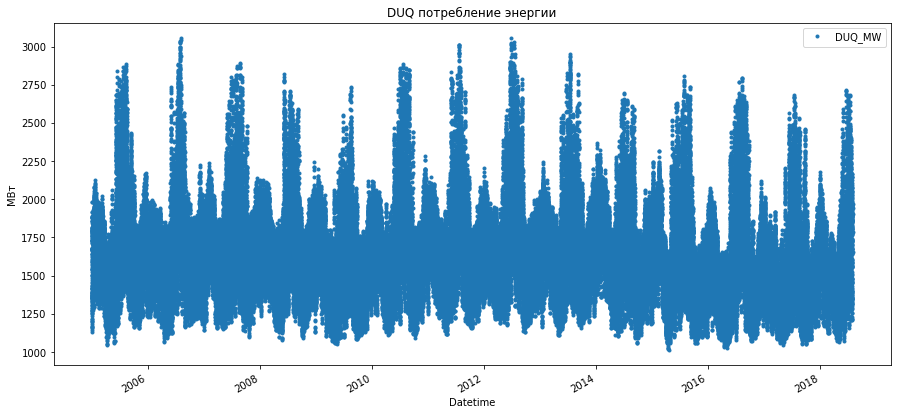

In [8]:
data_deok.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

In [9]:
data_deok['date'] = data_deok.index
data_deok.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458.0,2005-12-31 01:00:00
2005-12-31 02:00:00,1377.0,2005-12-31 02:00:00
2005-12-31 03:00:00,1351.0,2005-12-31 03:00:00
2005-12-31 04:00:00,1336.0,2005-12-31 04:00:00
2005-12-31 05:00:00,1356.0,2005-12-31 05:00:00


In [10]:
ut = data_deok['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data_deok.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [11]:
count_data = data_deok['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

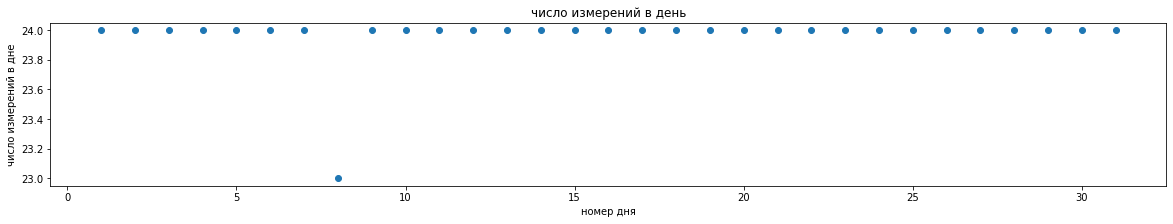

In [12]:
day_H=data_deok['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

In [13]:
data_deok['2014-03-09 01:00:00':'2014-03-09 06:00:00'].index          # переход на летнее время в 2014 году

DatetimeIndex(['2014-03-09 01:00:00', '2014-03-09 02:00:00',
               '2014-03-09 04:00:00', '2014-03-09 05:00:00',
               '2014-03-09 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

In [14]:
data_deok['2015-03-08 01:00:00':'2015-03-08 06:00:00'].index          # переход на летнее время в 2015 году

DatetimeIndex(['2015-03-08 01:00:00', '2015-03-08 02:00:00',
               '2015-03-08 04:00:00', '2015-03-08 05:00:00',
               '2015-03-08 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

In [15]:
data_deok['2016-03-13 01:00:00':'2016-03-13 06:00:00'].index          # переход на летнее время в 2016 году

DatetimeIndex(['2016-03-13 01:00:00', '2016-03-13 02:00:00',
               '2016-03-13 04:00:00', '2016-03-13 05:00:00',
               '2016-03-13 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

In [16]:
data_deok['2017-03-12 01:00:00':'2017-03-12 06:00:00'].index          # переход на летнее время в 2017 году

DatetimeIndex(['2017-03-12 01:00:00', '2017-03-12 02:00:00',
               '2017-03-12 04:00:00', '2017-03-12 05:00:00',
               '2017-03-12 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

In [17]:
#### Гипотезу о переходе на летнее(зимнее) время можно считать доказанной.

In [18]:
v1 = list((data_deok['2014-03-09 02:00:00']['DUQ_MW'].values + data_deok['2014-03-09 04:00:00']['DUQ_MW'].values) / 2)
v2 = list((data_deok['2015-03-08 02:00:00']['DUQ_MW'].values + data_deok['2015-03-08 04:00:00']['DUQ_MW'].values) / 2)
v3 = list((data_deok['2016-03-13 02:00:00']['DUQ_MW'].values + data_deok['2016-03-13 04:00:00']['DUQ_MW'].values) / 2)
v4 = list((data_deok['2017-03-12 02:00:00']['DUQ_MW'].values + data_deok['2017-03-12 04:00:00']['DUQ_MW'].values) / 2)
v =np.reshape([v1[0],v2[0],v3[0],v4[0]],(4,1))
print(v)

df_data = pd.DataFrame(index = pd.to_datetime(pd.Series(['2014-03-09 03:00:00','2015-03-08 03:00:00','2016-03-13 03:00:00','2017-03-12 03:00:00'])), columns =['DUQ_MW'] , data = v) 
df_data['date'] = df_data.index
df_data.head()

data_deok = data_deok.append(df_data,sort = False)
data_deok.tail()
#data_deok['2014-03-09 03:00:00'] 

[[1415. ]
 [1394.5]
 [1111.5]
 [1454. ]]


,DUQ_MW,date
2018-01-02 00:00:00,1721.0,2018-01-02 00:00:00
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00


In [19]:
count_data.iloc[:4]

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
Name: date, dtype: int64

In [20]:
data_deok.loc[count_data.iloc[:4].index]

,DUQ_MW,date
2017-11-05 02:00:00,1131.0,2017-11-05 02:00:00
2017-11-05 02:00:00,1105.0,2017-11-05 02:00:00
2014-11-02 02:00:00,1272.0,2014-11-02 02:00:00
2014-11-02 02:00:00,1240.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1113.0,2015-11-01 02:00:00
2015-11-01 02:00:00,1138.0,2015-11-01 02:00:00
2016-11-06 02:00:00,1121.0,2016-11-06 02:00:00
2016-11-06 02:00:00,1107.0,2016-11-06 02:00:00


In [21]:
df = data_deok.loc[count_data.iloc[:4].index]
df_ = df.groupby('date').mean()
df_['date'] = df_.index
print(df_)
print(df)
data_deok.drop(count_data.iloc[:4].index)
data_deok.shape

                     DUQ_MW                date
date                                           
2014-11-02 02:00:00  1256.0 2014-11-02 02:00:00
2015-11-01 02:00:00  1125.5 2015-11-01 02:00:00
2016-11-06 02:00:00  1114.0 2016-11-06 02:00:00
2017-11-05 02:00:00  1118.0 2017-11-05 02:00:00
                     DUQ_MW                date
2017-11-05 02:00:00  1131.0 2017-11-05 02:00:00
2017-11-05 02:00:00  1105.0 2017-11-05 02:00:00
2014-11-02 02:00:00  1272.0 2014-11-02 02:00:00
2014-11-02 02:00:00  1240.0 2014-11-02 02:00:00
2015-11-01 02:00:00  1113.0 2015-11-01 02:00:00
2015-11-01 02:00:00  1138.0 2015-11-01 02:00:00
2016-11-06 02:00:00  1121.0 2016-11-06 02:00:00
2016-11-06 02:00:00  1107.0 2016-11-06 02:00:00


(119072, 2)

In [22]:
data_deok['date'].drop_duplicates()
data_deok.shape

(119072, 2)

In [23]:
data_deok.iloc[19:26,:]

,DUQ_MW,date
2005-12-31 20:00:00,1737.0,2005-12-31 20:00:00
2005-12-31 21:00:00,1726.0,2005-12-31 21:00:00
2005-12-31 22:00:00,1669.0,2005-12-31 22:00:00
2005-12-31 23:00:00,1592.0,2005-12-31 23:00:00
2006-01-01 00:00:00,1493.0,2006-01-01 00:00:00
2005-12-30 01:00:00,1484.0,2005-12-30 01:00:00
2005-12-30 02:00:00,1419.0,2005-12-30 02:00:00


In [24]:
data_deok = data_deok.sort_index()

In [25]:
data_deok.iloc[19:26,:]

,DUQ_MW,date
2005-01-01 20:00:00,1546.0,2005-01-01 20:00:00
2005-01-01 21:00:00,1541.0,2005-01-01 21:00:00
2005-01-01 22:00:00,1534.0,2005-01-01 22:00:00
2005-01-01 23:00:00,1497.0,2005-01-01 23:00:00
2005-01-02 00:00:00,1389.0,2005-01-02 00:00:00
2005-01-02 01:00:00,1251.0,2005-01-02 01:00:00
2005-01-02 02:00:00,1204.0,2005-01-02 02:00:00


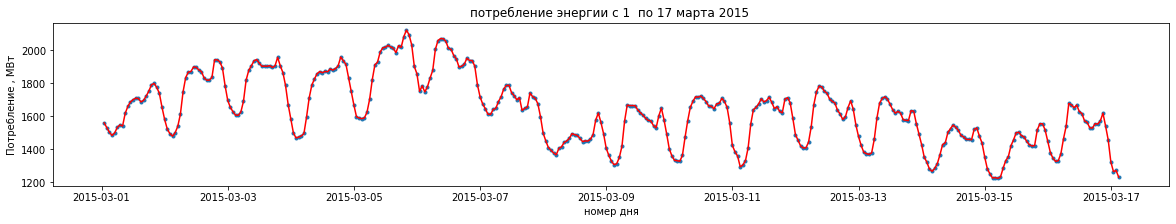

In [26]:
plt.figure(figsize=(20,3))
plt.plot(data_deok['2015-03-01 01:00:00':'2015-03-17 03:00:00'].index,data_deok['2015-03-01 01:00:00':'2015-03-17 03:00:00']['DUQ_MW'].values, '.')
plt.plot(data_deok['2015-03-01 01:00:00':'2015-03-17 03:00:00'].index,data_deok['2015-03-01 01:00:00':'2015-03-17 03:00:00']['DUQ_MW'].values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии с 1  по 17 марта 2015 ')
plt.show()

In [27]:
data_deok['date'] = data_deok.index

In [28]:
ut = data_deok['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data_deok.shape[0])

число уникальных значений:    119068  : число наблюдений :  119072


In [29]:
count_data = data_deok['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

#### Описание особенностей этой выборки и внесенных корректировок данных:
     - Исправлена последовательность во временных рядах с соответствии с календарной последовательностью;
     - Внесены исправления в показания часового потребления в связи с переходами на летнее и зимнее время.

#### 3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [30]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


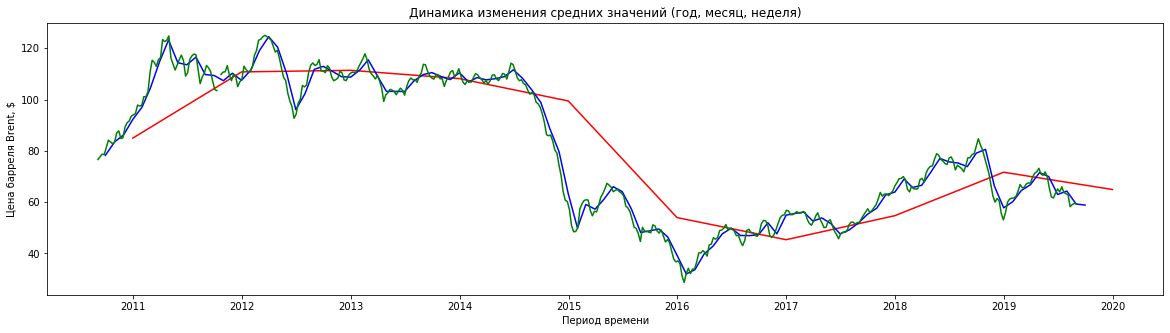

In [31]:
plt.figure(figsize=(20,5))
plt.plot(brent_data.resample("Y").mean(), 'r')
plt.plot(brent_data.resample("M").mean(), 'b')
plt.plot(brent_data.resample("W").mean(), 'g')

plt.xlabel('Период времени')
plt.ylabel('Цена барреля Brent, $')
plt.title('Динамика изменения средних значений (год, месяц, неделя)')
plt.show()

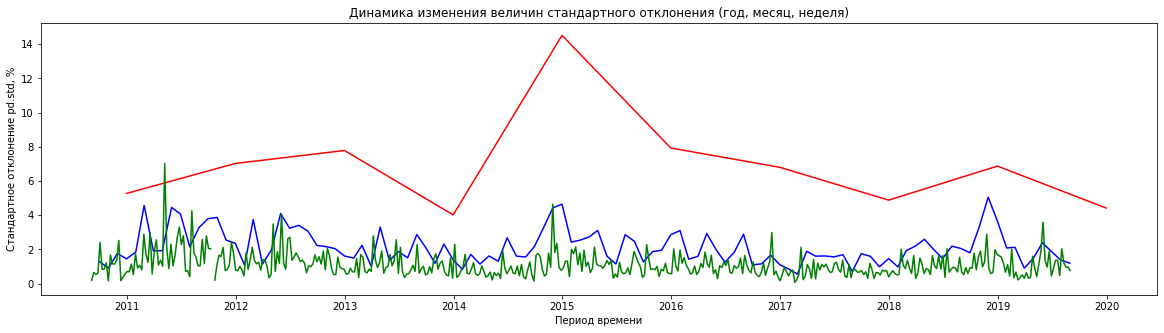

In [32]:
plt.figure(figsize=(20,5))
plt.plot(brent_data.resample("Y").std(), 'r')
plt.plot(brent_data.resample("M").std(), 'b')
plt.plot(brent_data.resample("W").std(), 'g')

plt.xlabel('Период времени')
plt.ylabel('Стандартное отклонение pd.std, %')
plt.title('Динамика изменения величин стандартного отклонения (год, месяц, неделя)')
plt.show()

##### 5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Сглаживаются колебания кривой. Чем больше интервал — тем более сглаженной окажется кривая.